# Analysis of IMDB Data


We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a publis s3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.tsv ---> (actors)
* s3://cis9760-lecture9-movieanalysis/title.basics.tsv ---> (genres)
* s3://cis9760-lecture9-movieanalysis/title.principals.tsv ---> (movie actors)
* s3://cis9760-lecture9-movieanalysis/title.ratings.tsv ---> (movie ratings)

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [4]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1670182157152_0004,pyspark,idle,Link,Link,✔


Let's install the necessary packages here

In [5]:
# let's install the packages we need: 
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6c/10/a7d0fa5baea8fe7b50f448ab742f26f52b80bfca85ac2be9d35cdd9a3246/pyparsing-3.0.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ab/8f/8dbe2d4efc4c0b08ec67d6efb7cc31fbfd688c80afad85f65980633b0d37/kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

Now, import the installed packages from the previous block below.

In [6]:
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object 


In [7]:
actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
genres = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
movie_actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
movie_ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Actors

Display the schema below:


In [8]:
actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 5 rows with the following columns:

* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [9]:
actors.select("primaryName", "birthYear", "deathYear", "knownForTitles").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

## Genres

Display the first 10 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [10]:
genres.select("titleType", "primaryTitle","genres").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows

Display the unique categories below:

In [11]:
genres.select('titleType').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Display the schema below:

In [12]:
genres.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Movie Actors

Display the schema below:

In [13]:
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 10 rows below

In [14]:
movie_actors.select("tconst", "ordering","nconst","category","job","characters").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

## Movie Ratings


Display the schema below:

In [15]:
movie_ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 10 rows in a descending order by the number of votes

In [16]:
from pyspark.sql.functions import col
movie_ratings.select("tconst", "averageRating","numVotes").sort(col("numVotes").desc()).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt7430722|          6.8|    9999|
|tt4445154|          8.1|    9997|
|tt2229907|          6.3|    9996|
|tt0294097|          8.0|    9994|
|tt0264734|          6.5|    9993|
|tt8860450|          6.3|    9991|
|tt2032572|          5.2|    9991|
|tt7201150|          8.5|     999|
|tt7508752|          7.9|     999|
|tt4082482|          6.8|     999|
+---------+-------------+--------+
only showing top 10 rows

# Overview of Data


Display the number of rows and columns in each dataFrame object.

In [17]:
print("Number of columns in Actors table:",len(actors.columns))
print("Number of rows in Actors table:",actors.count())
print("")
print("Number of columns in Genres table:",len(genres.columns))
print("Number of rows in Genres table:",genres.count())
print("")
print("Number of columns in Movie Actors table:",len(movie_actors.columns))
print("Number of rows in Movie Actors table:",movie_actors.count())
print("")
print("Number of columns in Movie Ratings table:",len(movie_ratings.columns))
print("Number of rows in Movie Ratings table:",movie_ratings.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Actors table: 6
Number of rows in Actors table: 9706922

Number of columns in Genres table: 9
Number of rows in Genres table: 6321302

Number of columns in Movie Actors table: 6
Number of rows in Movie Actors table: 36468817

Number of columns in Movie Ratings table: 3
Number of rows in Movie Ratings table: 993153

# PART 2 - Analyzing Genres


Let's now answer this question: how many unique genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [18]:
genres.select("tconst","titleType","genres").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

Display the first 10 rows of your association table below

In [19]:
from pyspark.sql.functions import split, col, explode
genres = genres.withColumn('genres',explode(split('genres',",")))
genres.select("tconst","titleType","genres").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|     genres|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres


**What is the total number of unique genres available in the movie category?**

In [20]:
genres.select("genres").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

**What are the unique genres available?**

In [21]:
genres.select("genres").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|     genres|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
+-----------+
only showing top 20 rows

**Oops! Something is off!**

In [22]:
nll = '\\N'
genres = genres.filter(col("genres") != nll)
genres.select("genres").distinct().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|     genres|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
+-----------+
only showing top 20 rows

In [23]:
nll = '\\N'
genres.select("genres").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

28

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (movie ratings and genres) by tconst

In [24]:
dframe = genres.join(movie_ratings, genres.tconst == movie_ratings.tconst).select(genres["genres"],movie_ratings["averageRating"]).filter((genres.titleType == "movie"))
dframe.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|   genres|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [28]:
from pyspark.sql.functions import avg, mean, count, sum, col, max
dframe.groupBy("genres").agg(
    mean("averageRating").alias("avg_rating")
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|     genres|        avg_rating|
+-----------+------------------+
|    Mystery|5.9404375359815775|
|    Musical|6.2032460545193695|
|     Action| 5.718734069668651|
|      Sport| 6.600145190562611|
|  Talk-Show|               5.8|
|    Romance|6.1257141803973605|
|   Thriller| 5.625967566447333|
| Reality-TV| 6.379310344827585|
|     Family| 6.250560452715201|
|    Fantasy| 5.924820762833381|
|    History| 6.822718115605146|
|  Animation| 6.326203750633555|
|  Film-Noir| 6.636246786632392|
|      Short|              7.26|
|     Sci-Fi| 5.325150008571917|
|       News| 7.200916030534348|
|      Drama| 6.288080210387901|
|Documentary|7.2454697986577195|
|    Western| 5.948970989337961|
|     Comedy| 5.941363108004128|
+-----------+------------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [ ]:
df = df.groupBy("genres").agg(mean("averageRating").alias("avg_rating"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

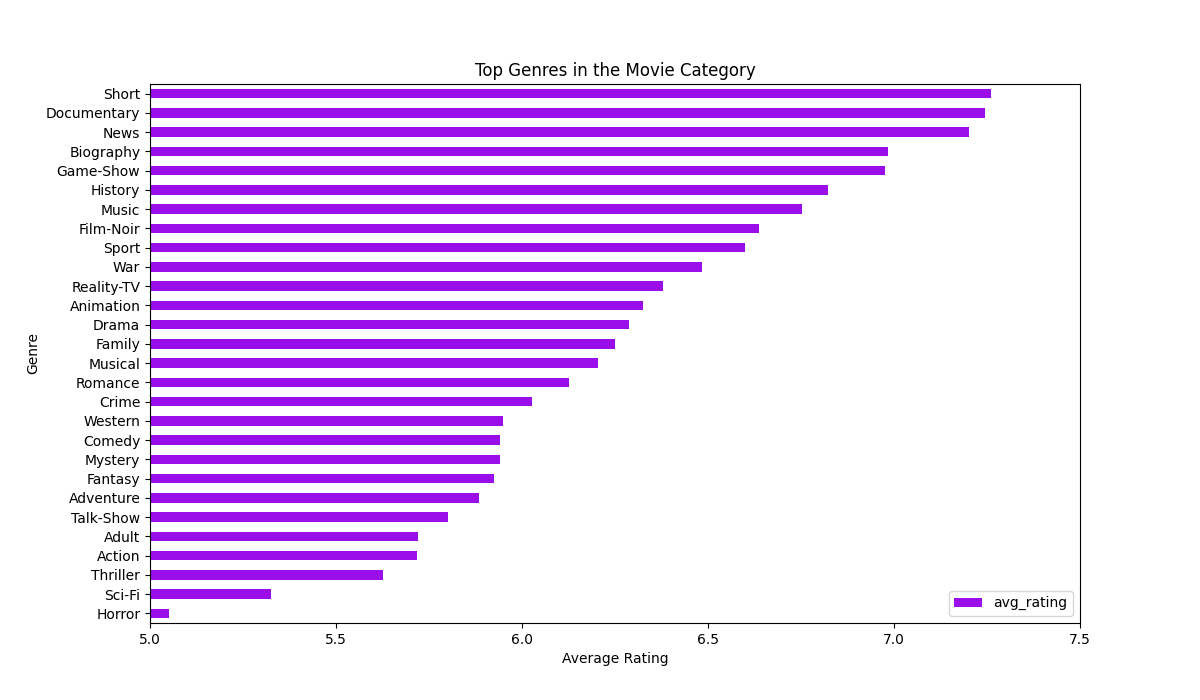

In [28]:
import matplotlib.pyplot as plt
df=df.sort(col("avg_rating").asc())
df.toPandas().plot.barh("genres","avg_rating",color ='#9A0EEA',figsize=(12,7))
plt.title("Top Genres in the Movie Category")
plt.ylabel("Genre")
plt.xlabel("Average Rating")
plt.xlim([5, 7.5]) 
%matplot plt

## PART 3 - Analyzing Job Categories


## Total Unique Job Categories

**What is the total number of unique job categories?**

In [29]:
movie_actors.select("tconst","category").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [30]:
movie_actors.select("category").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [31]:
movie_actors.select("category").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

## Top Job Categories


Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [32]:
movie_actors.groupBy("category").agg(count("category").alias("count")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [33]:
df2 = movie_actors.groupBy("category").agg(count("category").alias("count"))
df2.sort(col("count").desc()).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

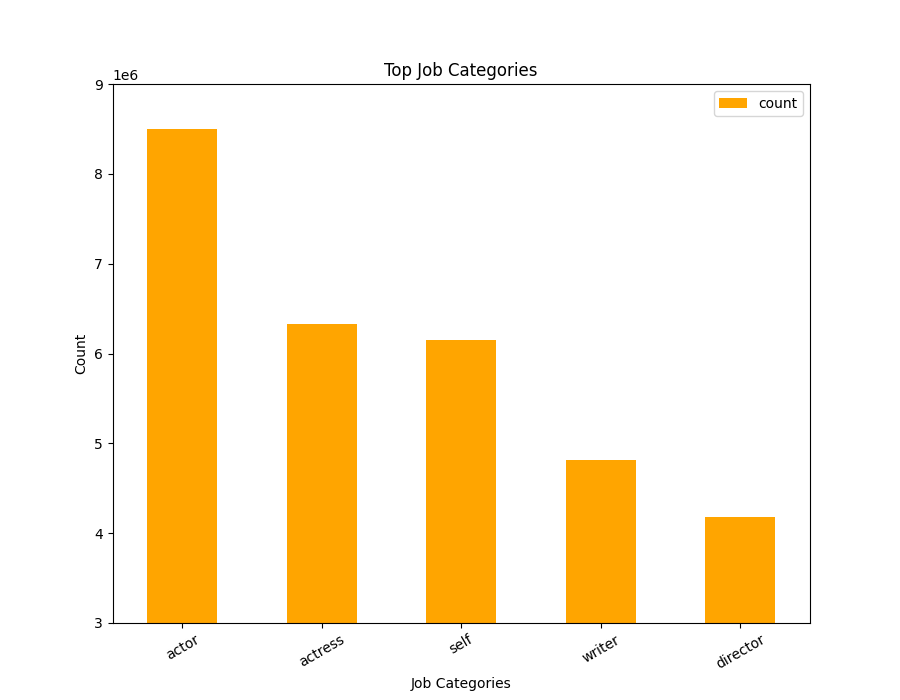

In [34]:
import matplotlib.pyplot as plt
df3=df2.sort(col("count").desc())
df3.toPandas().plot.bar("category","count",color ='orange', width=0.5, figsize=(9,7))
plt.title("Top Job Categories")
plt.ylabel("Count")
plt.xlabel("Job Categories")
plt.xlim([-0.5,4.5])
plt.ylim([3000000, 9000000]) 
plt.xticks(rotation=30)
%matplot plt

# PART 4 - Answer to the following questions:

## 1) Find all the "movies" featuring "Johnny Depp" and "Helena Bonham Carter".

First join actors, genres, and movie actors on each other

In [37]:
genres.printSchema()
actors.printSchema()
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

In [38]:
join1 = actors.join(movie_actors, on="nconst",how="inner").join(genres, on="tconst",how="inner")
join1 = join1.filter((join1.titleType == "movie")&  col("primaryTitle").isNotNull())
data1 = join1.select("primaryTitle").filter(join1.primaryName=="Johnny Depp")
data2 = join1.select("primaryTitle").filter(join1.primaryName=="Helena Bonham Carter")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
data1.select("primaryTitle").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|        primaryTitle|
+--------------------+
|           From Hell|
|Pirates of the Ca...|
|        Benny & Joon|
|   Finding Neverland|
|Scab Vendor: The ...|
|              Attica|
|       Arizona Dream|
|       Sleepy Hollow|
|...And They Lived...|
|                Hugo|
|       The Rum Diary|
|            Cry-Baby|
|Untitled Don Quix...|
|        Corpse Bride|
|           Inamorata|
|         Yoga Hosers|
|    Don Juan DeMarco|
|             Ed Wood|
|               Rango|
|Fear and Loathing...|
+--------------------+
only showing top 20 rows

In [40]:
data2.select("primaryTitle").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|        primaryTitle|
+--------------------+
|     The Heart of Me|
|  A Room with a View|
|Mary Shelley's Fr...|
|           Novocaine|
|        Enola Holmes|
|The Revengers' Co...|
|Where Angels Fear...|
|   The King's Speech|
|        Corpse Bride|
|          Cinderella|
|     Night Will Fall|
|The Theory of Flight|
|Tintoretto. A Reb...|
|         La maschera|
|           Francesco|
|The Wings of the ...|
|            55 Steps|
|         Saint Maize|
|        Dark Shadows|
|Sgt. Stubby: An A...|
+--------------------+
only showing top 20 rows

In [41]:
final_data = data1.join(data2, on="primaryTitle",how="inner")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# ANSWER

In [42]:
final_data.distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|        primaryTitle|
+--------------------+
|        Corpse Bride|
|        Dark Shadows|
|Charlie and the C...|
|Alice Through the...|
|Sweeney Todd: The...|
| Alice in Wonderland|
+--------------------+

## 2) Find all the "movies" featuring "Brad Pitt" after 2010.


In [43]:
nl1 = '\\N'
df5= genres.distinct().select("tconst", "primaryTitle","startYear") \
     .filter ((genres.titleType=="movie") & (genres.startYear > "2010") & (col("startYear") != nll))
df3=movie_actors.distinct().select("tconst","category", "nconst") \
    .filter ((movie_actors.category == "actor"))
df4=actors.distinct().select("primaryName","nconst") \
    .filter ((actors.primaryName == "Brad Pitt"))

b=df5.join(df3, ["tconst"]).distinct ( )
c=df4.join(df3, ["nconst"]).distinct ( )
d=b.join(c, ["tconst"]).distinct().drop ("tconst","primaryName", "titleType", "knownForTitles", "category", "nconst").dropDuplicates()
d.sort(col("startYear").desc()).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+
|        primaryTitle|startYear|
+--------------------+---------+
|             Babylon|     2021|
|Once Upon a Time ...|     2019|
|            Ad Astra|     2019|
|         War Machine|     2017|
|              Allied|     2016|
|       The Big Short|     2015|
|          By the Sea|     2015|
|                Fury|     2014|
|         World War Z|     2013|
|    12 Years a Slave|     2013|
| Killing Them Softly|     2012|
|           Moneyball|     2011|
|    The Tree of Life|     2011|
+--------------------+---------+

## 3) What is the number of "movies" "acted" by "Zendaya" per year?

In [44]:
nl1 = '\\N'
df5= genres.select("tconst", "primaryTitle","startYear") \
     .filter ((genres.titleType=="movie") & (col("startYear") != nll)) 
df3=movie_actors.select("tconst", "nconst")
df4=actors.select("primaryName","nconst") \
    .filter ((actors.primaryName == "Zendaya")) 

b=df5.join(df3, ["tconst"]).distinct ( )
c=df4.join(df3, ["nconst"]).distinct ( )
d=b.join(c, ["tconst"]). distinct().drop ("tconst","primaryName", "titleType", "knownForTitles",  "nconst").dropDuplicates().groupBy("startYear").agg(count("startYear").alias("count")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|     2020|    1|
|     2018|    2|
|     2017|    1|
+---------+-----+

## 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?

In [48]:
movie_ratings.join(genres,on="tconst", how="left")\
.select("primaryTitle","averageRating")\
.withColumn("averageRating", col("averageRating").cast("float"))\
.filter((col("titletype")=="movie")&((col("startYear"))==2019))\
.sort(col("averageRating").desc()).distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|        primaryTitle|averageRating|
+--------------------+-------------+
| The Butcher Baronet|         10.0|
|A Medicine for th...|         10.0|
|Bu Can Var Oldugu...|         10.0|
|   L'Enfant Terrible|         10.0|
|      A Grunt's Life|         10.0|
|              Kirket|         10.0|
|   Our Scripted Life|         10.0|
|The Twilight Zone...|         10.0|
|    Love in Kilnerry|         10.0|
|         Superhombre|          9.9|
|        The Cardinal|          9.9|
|Puritan: All of L...|          9.9|
|     Time and motion|          9.8|
|We Shall Not Die Now|          9.8|
|   From Shock to Awe|          9.8|
|          Square One|          9.8|
|Kamen Rider Zi-O:...|          9.8|
|            Randhawa|          9.8|
|   Gini Helida Kathe|          9.8|
|         Freie Räume|          9.7|
+--------------------+-------------+
only showing top 20 rows

## Extra Credit - Analysis of your choice (2 pts)

Try and analyze some interesting dimension to this data. You should specify the name of the analysis in your Project2_Analysis.ipynb. This part similar to Part 2 and Part 3.

•	You must create at least one visual.

## Extra Credit 1) Count of Top Title Types in IMDb

In [36]:
dframe2 = genres.groupBy("titleType").agg(count("titleType").alias("count"))
dframe2.sort(col("count").desc()).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-------+
|   titleType|  count|
+------------+-------+
|   tvEpisode|6562819|
|       short|1464571|
|       movie| 719615|
|       video| 387723|
|    tvSeries| 215033|
|     tvMovie| 138510|
|tvMiniSeries|  35339|
|   videoGame|  33753|
|   tvSpecial|  26638|
|     tvShort|  23559|
+------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

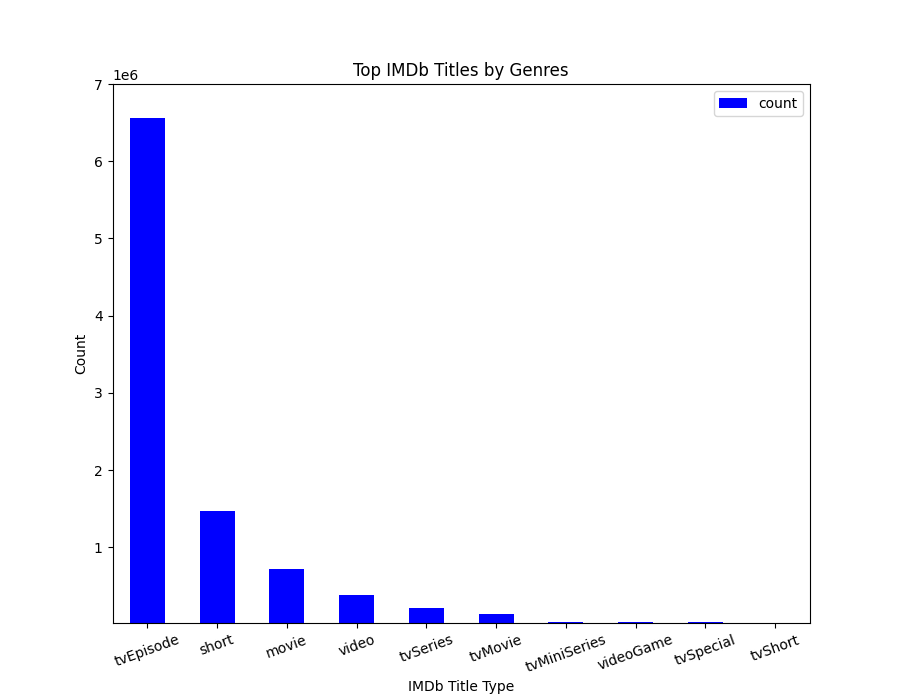

In [42]:
import matplotlib.pyplot as plt
dframe3=dframe2.sort(col("count").desc())
dframe3.toPandas().plot.bar("titleType","count",color ='blue', width=0.5, figsize=(9,7))
plt.title("Top IMDb Titles by Genres")
plt.ylabel("Count")
plt.xlabel("IMDb Title Type")
plt.ylim([20000, 7000000]) 
plt.xticks(rotation=20)
%matplot plt

## Extra Credit - Answering a question of your choice (2 pts)

Come up an answer to a question like in Part 4. The question of your choice should not be similar to the ones given in Part 4. Try to find an interesting question using different columns (i.e. num_votes, runtime). You should specify the question in Project2_Analysis.ipynb. 

•	You must join at least two datasets.

## Extra Credit 2) Top 100 Short Films with a 3 minute Runtime or Shorter

In [56]:
movie_ratings.join(genres,on="tconst", how="left")\
.select("primaryTitle","runtimeMinutes", "averageRating")\
.withColumn("averageRating", col("averageRating").cast("float"))\
.filter((col("titleType")=="short")&((col("runtimeMinutes"))<= 3))\
.sort(col("averageRating").desc()).distinct().show(100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------+-------------+
|        primaryTitle|runtimeMinutes|averageRating|
+--------------------+--------------+-------------+
|           Paparazzi|             3|         10.0|
|      Maledetta Cuba|             3|         10.0|
|                 Blå|             3|         10.0|
|       Stabber Horst|             2|         10.0|
|          One Minute|             2|         10.0|
|           Reel Life|             3|         10.0|
|             Xenesis|             2|         10.0|
|           Pool Guys|             2|         10.0|
|Breve film contro...|             1|         10.0|
|     Io non ci casco|             2|         10.0|
|         Black River|             1|         10.0|
| Je suis célibataire|             3|         10.0|
|            Captured|             3|         10.0|
|             Palette|             1|         10.0|
|              Nation|             2|         10.0|
|A Ballad of Solitude|             2|         10.0|
|Istrione o 

In [48]:
genres.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']

In [50]:
movie_ratings.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['tconst', 'averageRating', 'numVotes']